<a href="https://colab.research.google.com/github/abhishek-srivathsa/SDN_Model/blob/main/SDN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


%matplotlib inline


In [ ]:
ping_df = pd.read_csv('ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)

In [ ]:
print(df.shape)

(5242, 13)


In [ ]:
df.describe()

,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second
count,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000
mean,7.814765,682.359214,7.763640,6.094360,677.842999,530.202926,17.525754,2070.781000,17.447921,15.710718,2064.795498,1943.829194
std,27.445539,2417.020821,27.343341,10.656380,2407.997270,937.773493,31.726859,3404.747532,31.645749,18.427478,3401.356026,2739.969899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.909309,0.000000,62.009611,1.000000,71.000000,1.000000,1.020725,71.000000,98.670691
50%,1.000000,66.000000,1.000000,1.021459,66.000000,98.762821,1.000000,98.000000,1.000000,1.430508,98.000000,192.470941
75%,1.000000,98.000000,1.000000,1.038462,98.000000,99.485632,37.000000,3696.000000,37.000000,34.969697,3541.000000,2313.000000
max,211.000000,18581.000000,211.000000,76.750000,18581.000000,6711.000000,210.000000,15484.000000,210.000000,76.500000,15484.000000,7054.188679


In [ ]:
df['Traffic Type'] = df['Traffic Type'].astype('category')
df['Traffic Type'].cat.categories

Index(['dns', 'ping', 'telnet', 'voice'], dtype='object')

In [ ]:
df['Traffic Type'].cat.codes.head()
print('Features:',df.columns[:-1].values)

Features: ['Delta Forward Packets' 'Delta Forward Bytes'
 'Forward Instantaneous Packets per Second'
 'Forward Average Packets per second'
 'Forward Instantaneous Bytes per Second'
 'Forward Average Bytes per second' 'Delta Reverse Packets'
 'Delta Reverse Bytes' 'DeltaReverse Instantaneous Packets per Second'
 'Reverse Average Packets per second'
 'Reverse Instantaneous Bytes per Second'
 'Reverse Average Bytes per second']


In [ ]:
print ('Value counts:')
df['Traffic Type'].value_counts()

Value counts:


ping      1770
telnet    1181
dns       1154
voice     1137
Name: Traffic Type, dtype: int64

In [ ]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=101)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
idx = 2590 #random number
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']
single_prediction = model.predict(single_x_test)
print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

For this sample, our model predicted voice and it was actually voice


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predictions = model.predict(X_test)
resultsDF = pd.DataFrame({
        'true':y_test,
        'predicted':predictions
    })
resultsDF.head()

,true,predicted
3156,dns,dns
2530,voice,voice
3129,dns,dns
2301,voice,voice
2746,voice,voice


In [ ]:
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 98.93%


In [ ]:
cm = confusion_matrix(predictions,y_test, labels=y.cat.categories)
print(cm)

[[569   0   2   2]
 [  1 885  12   1]
 [  0   8 569   0]
 [  1   0   1 570]]


In [ ]:
cmDF = pd.DataFrame()

for i, row in enumerate(y.cat.categories):
    temp = {}
    for j, col in enumerate(y.cat.categories): 
        temp[col]=cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))

print(cmDF)

        dns  ping  telnet  voice
dns     569     0       2      2
ping      1   885      12      1
telnet    0     8     569      0
voice     1     0       1    570


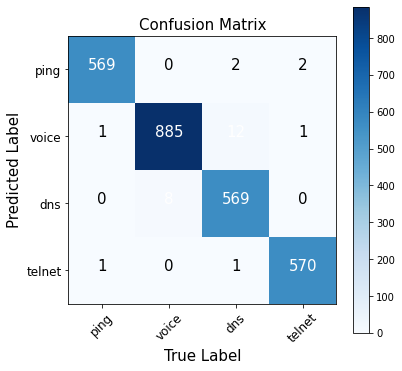

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)

In [ ]:
#k-means
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

In [ ]:
model = KMeans(n_clusters=len(y.cat.categories))

In [ ]:
clusters = model.fit_predict(X)
model.cluster_centers_.shape

(4, 12)

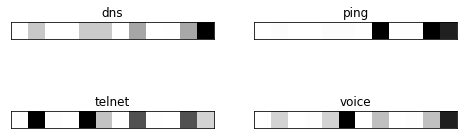

In [ ]:
fig = plt.figure(figsize=(8, 3))
for i in range(len(y.cat.categories)):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[], yticks=[])
    ax.set_title(str(y.cat.categories[i]))
    ax.imshow(model.cluster_centers_[i].reshape((1, 12)), cmap=plt.cm.binary)

In [ ]:
df['Traffic Type'].value_counts()

ping      1770
telnet    1181
dns       1154
voice     1137
Name: Traffic Type, dtype: int64

In [ ]:
strlabels = ['']*len(y)
for i in range(len(clusters)):
    if clusters[i]==0: strlabels[i] = 'dns'
    elif clusters[i]==1: strlabels[i] = 'ping'
    elif clusters[i]==2: strlabels[i] = 'telnet'
    elif clusters[i]==3: strlabels[i] = 'voice'

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, strlabels)*100.0

5.646699732926364

In [ ]:
cm=confusion_matrix(y, strlabels, labels=['ping','voice','dns','telnet'])
cm

array([[   0, 1770,    0,    0],
       [ 986,    3,  148,    0],
       [   0, 1154,    0,    0],
       [  26,  779,   83,  293]])

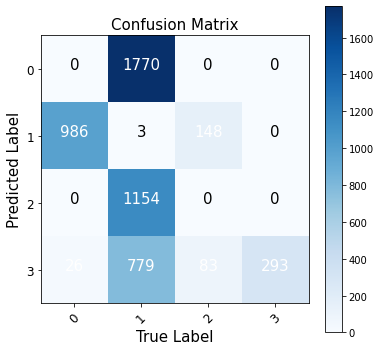

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, rotation=45, fontsize=12)
plt.yticks(tick_marks,  fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)